In [54]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

N = 125
A = 1
R = 0
M = 1
q = 0.02
rho = 0.5

tranches = [[1,3],[4, 6],[7,9]]

def p(M, rho, lims):
    qM = norm.cdf((norm.ppf(q)-np.sqrt(rho)*M)/(np.sqrt(1-rho)))
    pN = binom(N, qM)
    prob = 3*(pN.cdf(N) - pN.cdf(lims[1]-1))
    for i in range(lims[0], lims[1]):
        index = i-lims[0]-1
        prob += index*pN.pmf(index)        
    return norm.pdf(M)*prob

res = [[],[],[]]
for i in range(len(tranches)):
    for rho in np.arange(0, 1.0, 0.05):
        v = quad(p, -np.inf, np.inf, args=(rho, tranches[i]))
        res[i].append(v[0])

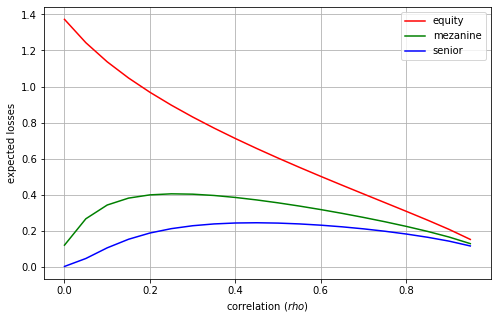

In [57]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 1., 0.05), res[0], label="equity", color='red')
plt.plot(np.arange(0, 1., 0.05), res[1], label="mezanine", color='green')
plt.plot(np.arange(0, 1., 0.05), res[2], label="senior", color='blue')
plt.grid(True)
plt.xlabel("correlation ($rho$)")
plt.ylabel("expected losses")
plt.legend()
plt.show()